<a href="https://colab.research.google.com/github/eeuuais/analysis-stockdata-ml/blob/main/Samsung_Electronics_stock_data_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주식데이터 분석
- 야후 파이낸스로 주식시세 구하기
- 일간변동률
- 삼성전자와 마이크로소프트 주식 수익률 비교
- 다우존스 지수와 KOSPI 회귀분석

In [1]:
!pip install yfinance #야후 파이낸스 설치

In [2]:
!pip install pandas-datareader

In [30]:
from pandas_datareader import data as pdr
import yfinance as yf

# Import stock data
samsung = yf.download('005930.KS', start='2024-01-01')
msft = yf.download('MSFT', start='2024-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [31]:
samsung.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS,005930.KS
Date,,,,,,
2024-01-02 00:00:00+00:00,78447.882812,79600.0,79800.0,78200.0,78200.0,17142847
2024-01-03 00:00:00+00:00,75885.523438,77000.0,78800.0,77000.0,78500.0,21753644
2024-01-04 00:00:00+00:00,75491.304688,76600.0,77300.0,76100.0,76100.0,15324439
2024-01-05 00:00:00+00:00,75491.304688,76600.0,77100.0,76400.0,76700.0,11304316
2024-01-08 00:00:00+00:00,75392.757812,76500.0,77500.0,76400.0,77000.0,11088724
2024-01-09 00:00:00+00:00,73618.804688,74700.0,77700.0,74300.0,77400.0,26019249
2024-01-10 00:00:00+00:00,72534.726562,73600.0,75200.0,73200.0,75000.0,20259529
2024-01-11 00:00:00+00:00,72140.523438,73200.0,73600.0,72700.0,72900.0,57691266


- Adj Close : 수정 종가. 액면 분할 등으로 주식 가격에 변동이 있을 경우 가격 변동 이전에 거래된 가격을 현재 주식 가격에 맞춰 수정하여 표시한 가격
- Close : 종가
- High : 고점
- Low : 저점
- Open : 시작가
- Volume : 거래량

In [32]:
# Check index

samsung.index

DatetimeIndex(['2024-01-02 00:00:00+00:00', '2024-01-03 00:00:00+00:00',
               '2024-01-04 00:00:00+00:00', '2024-01-05 00:00:00+00:00',
               '2024-01-08 00:00:00+00:00', '2024-01-09 00:00:00+00:00',
               '2024-01-10 00:00:00+00:00', '2024-01-11 00:00:00+00:00',
               '2024-01-12 00:00:00+00:00', '2024-01-15 00:00:00+00:00',
               ...
               '2024-11-07 00:00:00+00:00', '2024-11-08 00:00:00+00:00',
               '2024-11-11 00:00:00+00:00', '2024-11-12 00:00:00+00:00',
               '2024-11-13 00:00:00+00:00', '2024-11-14 00:00:00+00:00',
               '2024-11-15 00:00:00+00:00', '2024-11-18 00:00:00+00:00',
               '2024-11-19 00:00:00+00:00', '2024-11-20 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=217, freq=None)

- 삼성전자의 데이터프레임은 인덱스가 datetime형이고 217개 있다.

In [33]:
samsung.columns

MultiIndex([('Adj Close', '005930.KS'),
            (    'Close', '005930.KS'),
            (     'High', '005930.KS'),
            (      'Low', '005930.KS'),
            (     'Open', '005930.KS'),
            (   'Volume', '005930.KS')],
           names=['Price', 'Ticker'])

In [34]:
# 멀티인덱스 해제

samsung = samsung.droplevel(axis=1, level=1)  # 멀티인덱스 해제
samsung.reset_index(inplace=True)          # 인덱스 초기화
samsung.set_index('Date', inplace=True)    # Date 열을 인덱스로 설정

msft = msft.droplevel(axis=1, level=1)  # 멀티인덱스 해제
msft.reset_index(inplace=True)          # 인덱스 초기화
msft.set_index('Date', inplace=True)    # Date 열을 인덱스로 설정

In [35]:
samsung.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-01-02 00:00:00+00:00,78447.882812,79600.0,79800.0,78200.0,78200.0,17142847
2024-01-03 00:00:00+00:00,75885.523438,77000.0,78800.0,77000.0,78500.0,21753644
2024-01-04 00:00:00+00:00,75491.304688,76600.0,77300.0,76100.0,76100.0,15324439
2024-01-05 00:00:00+00:00,75491.304688,76600.0,77100.0,76400.0,76700.0,11304316
2024-01-08 00:00:00+00:00,75392.757812,76500.0,77500.0,76400.0,77000.0,11088724
2024-01-09 00:00:00+00:00,73618.804688,74700.0,77700.0,74300.0,77400.0,26019249
2024-01-10 00:00:00+00:00,72534.726562,73600.0,75200.0,73200.0,75000.0,20259529
2024-01-11 00:00:00+00:00,72140.523438,73200.0,73600.0,72700.0,72900.0,57691266
2024-01-12 00:00:00+00:00,72041.968750,73100.0,74100.0,72800.0,73000.0,13038939


In [36]:
msft.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-01-02 00:00:00+00:00,368.854095,370.869995,375.899994,366.769989,373.859985,25258600
2024-01-03 00:00:00+00:00,368.585571,370.600006,373.260010,368.510010,369.010010,23083500
2024-01-04 00:00:00+00:00,365.940002,367.940002,373.100006,367.170013,370.670013,20901500
2024-01-05 00:00:00+00:00,365.751038,367.750000,372.059998,366.500000,368.970001,20987000
2024-01-08 00:00:00+00:00,372.653351,374.690002,375.200012,369.010010,369.299988,23134000
2024-01-09 00:00:00+00:00,373.747375,375.790009,375.989990,371.190002,372.010010,20830000
2024-01-10 00:00:00+00:00,380.689392,382.769989,384.170013,376.320007,376.369995,25514200
2024-01-11 00:00:00+00:00,382.539307,384.630005,390.679993,380.380005,386.000000,27850800
2024-01-12 00:00:00+00:00,386.358429,388.470001,388.679993,384.649994,385.489990,21645700


In [37]:
# 인덱스 날짜 형식 변경

samsung.index = samsung.index.strftime('%Y-%m-%d')
msft.index = msft.index.strftime('%Y-%m-%d')

In [38]:
samsung.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-01-02,78447.882812,79600.0,79800.0,78200.0,78200.0,17142847
2024-01-03,75885.523438,77000.0,78800.0,77000.0,78500.0,21753644
2024-01-04,75491.304688,76600.0,77300.0,76100.0,76100.0,15324439
2024-01-05,75491.304688,76600.0,77100.0,76400.0,76700.0,11304316
2024-01-08,75392.757812,76500.0,77500.0,76400.0,77000.0,11088724
2024-01-09,73618.804688,74700.0,77700.0,74300.0,77400.0,26019249
2024-01-10,72534.726562,73600.0,75200.0,73200.0,75000.0,20259529
2024-01-11,72140.523438,73200.0,73600.0,72700.0,72900.0,57691266
2024-01-12,72041.968750,73100.0,74100.0,72800.0,73000.0,13038939


In [15]:
import pandas as pd

msft.index = pd.to_datetime(msft.index)

In [17]:
msft.head(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
2024-01-02 00:00:00+00:00,368.854095,370.869995,375.899994,366.769989,373.859985,25258600
2024-01-03 00:00:00+00:00,368.585571,370.600006,373.260010,368.510010,369.010010,23083500
2024-01-04 00:00:00+00:00,365.940002,367.940002,373.100006,367.170013,370.670013,20901500
2024-01-05 00:00:00+00:00,365.751038,367.750000,372.059998,366.500000,368.970001,20987000
2024-01-08 00:00:00+00:00,372.653351,374.690002,375.200012,369.010010,369.299988,23134000
2024-01-09 00:00:00+00:00,373.747345,375.790009,375.989990,371.190002,372.010010,20830000
2024-01-10 00:00:00+00:00,380.689392,382.769989,384.170013,376.320007,376.369995,25514200
2024-01-11 00:00:00+00:00,382.539337,384.630005,390.679993,380.380005,386.000000,27850800


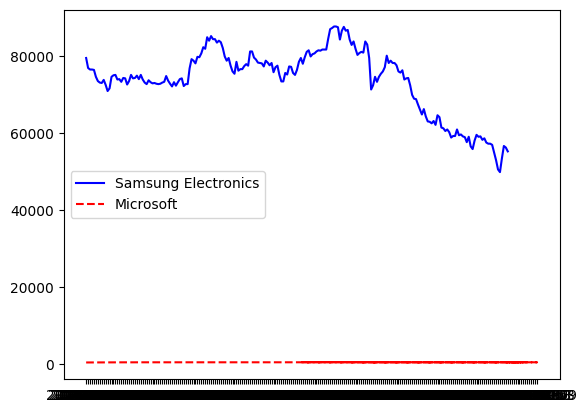

In [39]:
# 종가데이터 그래프로 확인

import matplotlib.pyplot as plt

plt.plot(samsung.index, samsung.Close, 'b', label='Samsung Electronics') # index = 날짜
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.legend(loc='best') # 적절한 위치에 범례 표시
plt.show()

- 서로 단위가 맞지 않아 수치차이가 커서 마이크로소프트 주식은 거의 0에 가까운 직선으로 표시됨.
- 수익률 비교가 어려움 => 일간 변동률을 이용해 비교 필요
- 오늘 변동률 = (오늘종가-어제종가)/(어제종가)*100

In [40]:
type(samsung['Close'])

pandas.core.series.Series

In [43]:
# 삼성전자 종가 칼럼 데이터 확인
samsung['Close']

,Close
Date,
2024-01-02,79600.0
2024-01-03,77000.0
2024-01-04,76600.0
2024-01-05,76600.0
2024-01-08,76500.0
...,...
2024-11-14,49900.0
2024-11-15,53500.0
2024-11-18,56700.0


In [44]:
# shift() 함수를 이용하여 이전 거래일의 종가칼럼 구하기

samsung['Close'].shift(1)  # 인수로 1을 주면 전체 데이터가 1행씩 뒤로 이동

,Close
Date,
2024-01-02,NaN
2024-01-03,79600.0
2024-01-04,77000.0
2024-01-05,76600.0
2024-01-08,76600.0
...,...
2024-11-14,50600.0
2024-11-15,49900.0
2024-11-18,53500.0


In [46]:
# 일간 변동률 구하기

samsung_dpc = (samsung['Close'] / samsung['Close'].shift(1) - 1) * 100
samsung_dpc.head()

,Close
Date,
2024-01-02,NaN
2024-01-03,-3.266332
2024-01-04,-0.519481
2024-01-05,0.000000
2024-01-08,-0.130548


In [47]:
# 첫번째 일간 변동률의 값이 NaN인데, 향후 계산을 위해 0으로 변경

samsung_dpc.iloc[0] = 0 # intiger location indexer
samsung_dpc.head()

,Close
Date,
2024-01-02,0.000000
2024-01-03,-3.266332
2024-01-04,-0.519481
2024-01-05,0.000000
2024-01-08,-0.130548


In [48]:
# 마이크로소프트 데이터도 똑같이 처리

msft['Close'].shift(1)

msft_dpc = (msft['Close'] / msft['Close'].shift(1) - 1) * 100

msft_dpc.iloc[0] = 0 # intiger location indexer
msft_dpc.head()

,Close
Date,
2024-01-02,0.000000
2024-01-03,-0.072799
2024-01-04,-0.717756
2024-01-05,-0.051640
2024-01-08,1.887152


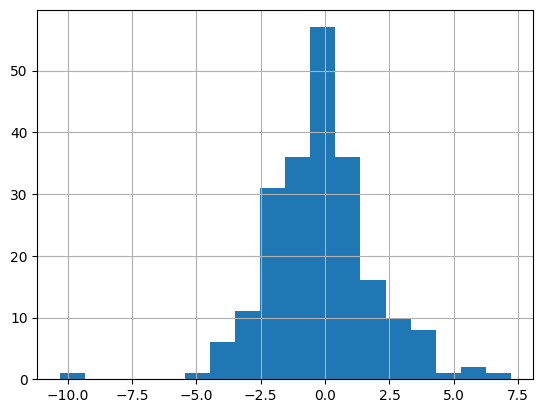

In [49]:
# 삼성전자 종가의 일간변동률
# hist() 함수에서 사용되는 빈스의 기본값은 10

samsung_dpc = (samsung['Close'] - samsung['Close'].shift(1)) / samsung['Close'].shift(1) * 100
samsung_dpc.iloc[0] = 0
plt.hist(samsung_dpc, bins=18) # 18개 구간으로 나누어 표시
plt.grid(True)
plt.show()

In [50]:
samsung_dpc.describe()

,Close
count,217.000000
mean,-0.146823
std,2.045603
min,-10.301508
25%,-1.375000
50%,-0.130548
75%,0.794702
max,7.214429


- 삼성전자 일간 변동률의 전체 데이터는 217개, 평균은 -0.14, 표준편차는 2.04

In [53]:
# 일간 변동률 누적합

samsung_dpc_cs = samsung_dpc.cumsum()
samsung_dpc_cs

,Close
Date,
2024-01-02,0.000000
2024-01-03,-3.266332
2024-01-04,-3.785812
2024-01-05,-3.785812
2024-01-08,-3.916360
...,...
2024-11-14,-42.574688
2024-11-15,-35.360259
2024-11-18,-29.378951


- 삼성전자의 2024년 누적합 : 약 31%의 손실을 기록

In [54]:
msft_dpc = (msft['Close'] / msft['Close'].shift(1) - 1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()

In [56]:
msft_dpc_cs.head()

,Close
Date,
2024-01-02,0.000000
2024-01-03,-0.072799
2024-01-04,-0.790555
2024-01-05,-0.842194
2024-01-08,1.044958


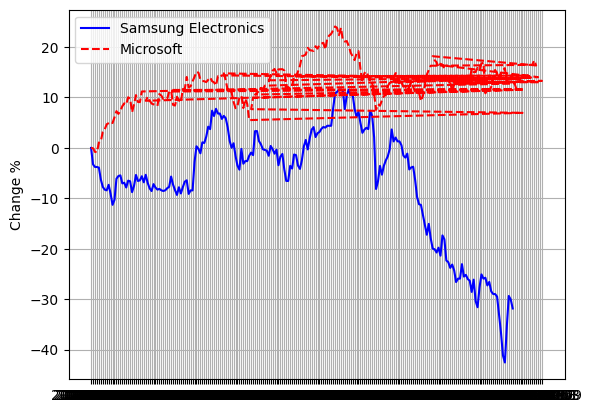

In [57]:
# 삼성전자와 마이크로소프트 주식 수익률 비교

plt.plot(samsung.index, samsung_dpc_cs, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft_dpc_cs, 'r--', label='Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

- 최대 손실 낙폭(Maximum Drawdown, MDD)
    - 특정 기간에 발생한 최고점에서 최저점까지의 가장 큰 손실
    - 퀀트 투자에서는 수익률을 높이는 것보다 MDD를 낮추는 것이 더 낫다고 할만큼 중요한 지표
    - 특정 기간 동안 최대한 얼마의 손실이 날 수 있는지를 나타낸다.
    - MDD = (최저점 - 최고점) / 최저점

- rolling()
    - 시리즈에서 윈도우 크기에 해당하는 개수만큼 데이터를 추출하여 집계함수에 해당하는 연산을 실시한다.
    - min_periods를 지정하면 데이터 개수가 윈도우 크기에 못미치더라도 min_periods로 지정한 개수만 만족하면 연산을 수행한다.

In [58]:
# KOSPI 지수 데이터로 1년 동안의 최댓값과 최솟값을 구하여 MDD 계산

from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

kospi = yf.download('^KS11', start='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [60]:
kospi

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11,^KS11
Date,,,,,,
2024-01-02 00:00:00+00:00,2669.810059,2669.810059,2675.800049,2641.879883,2645.469971,409900
2024-01-03 00:00:00+00:00,2607.310059,2607.310059,2643.719971,2607.310059,2643.540039,463100
2024-01-04 00:00:00+00:00,2587.020020,2587.020020,2602.639893,2580.090088,2592.439941,770200
2024-01-05 00:00:00+00:00,2578.080078,2578.080078,2592.290039,2572.600098,2586.889893,520500
2024-01-08 00:00:00+00:00,2567.820068,2567.820068,2591.679932,2566.340088,2584.229980,320100
...,...,...,...,...,...,...
2024-11-14 00:00:00+00:00,2418.860107,2418.860107,2441.429932,2410.929932,2430.260010,640000
2024-11-15 00:00:00+00:00,2416.860107,2416.860107,2433.179932,2390.560059,2413.050049,623300


[*********************100%***********************]  1 of 1 completed


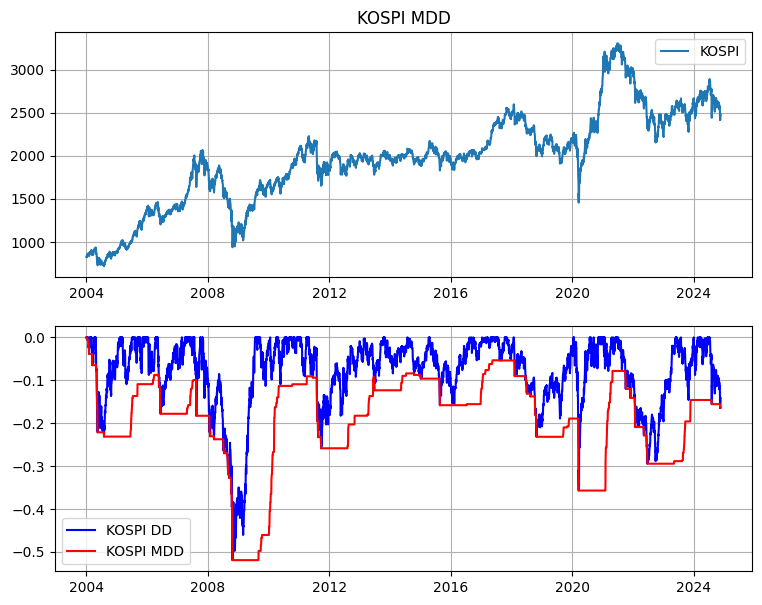

In [62]:
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

kospi = yf.download('^KS11', start='2004-01-04')

# MDD 계산
window = 217 # 1년동안의 개장일
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()  # 최고치
drawdown = kospi['Adj Close'] / peak - 1.0                      # peak대비 현재 KOSPI 종가가 얼마나 하락했는지 구하기
max_dd = drawdown.rolling(window, min_periods=1).min()          # 최저치. 마이너스값이기 때문에 최저치가 MDD가 된다

# 그래프 그리기
plt.figure(figsize=(9, 7))

# 첫 번째 subplot: KOSPI 지수
plt.subplot(211)
plt.plot(kospi['Close'], label='KOSPI')
plt.title('KOSPI MDD')
plt.grid(True)
plt.legend()

# 두 번째 subplot: Drawdown과 Max Drawdown
plt.subplot(212)
plt.plot(drawdown, c='blue', label='KOSPI DD')
plt.plot(max_dd, c='red', label='KOSPI MDD')
plt.grid(True)
plt.legend()

plt.show()


- 2008년 서브프라임 금융위기에는 kospi 지수가 10.57% 하락하면서 MDD가 -54.5% 기록

In [66]:
# 정확한 MDD 구하기

max_dd.min().min()

-0.5193710845043636

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


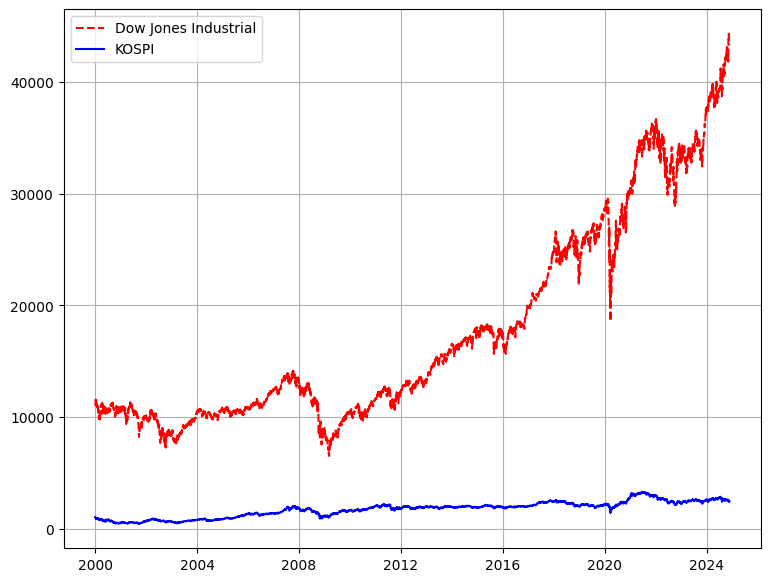

In [85]:
# KOSPI와 다우존스 지수 비교

import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

dow = yf.download('^DJI', start='2000-01-04')
kospi = yf.download('^KS11', start='2000-01-04')

plt.figure(figsize=(9, 7))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show() # 지수 기준값이 달라서 어느 지수가 더 좋은 성과를 냈는지는 한눈에 알아보기 어렵다

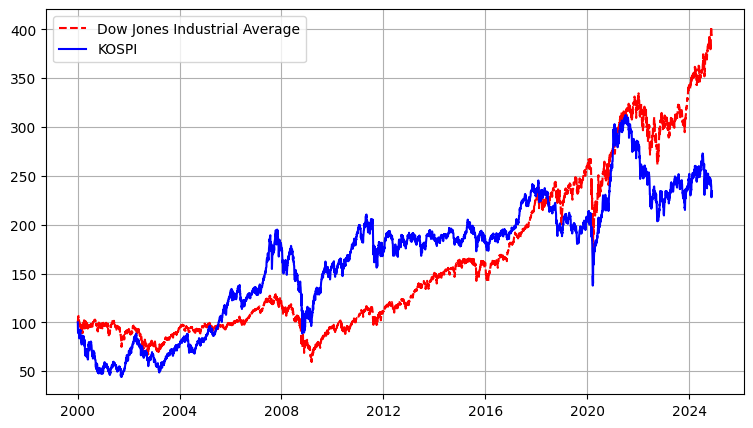

In [86]:
# 지수화(indexation) 비교
# 현재 종가를 특정 시점의 종가로 나누어 변동률을 구하기

d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

plt.figure(figsize=(9, 5))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial Average')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

- 오늘 종가를 2000-01-04의 종가로 나눈 뒤 100을 곱하면, 그날 종가 대비 오늘의 변동률을 구할 수 있다. 이를 지수화라고 한다.(indexation)
- 지난 20년간 KOSPI의 상승률이 다우존스 지수의 상승률과 엇비슷했다.

In [87]:
# 산점도 분석

print(len(dow))
print(len(kospi))

6260
6134


ValueError: x and y must be the same size

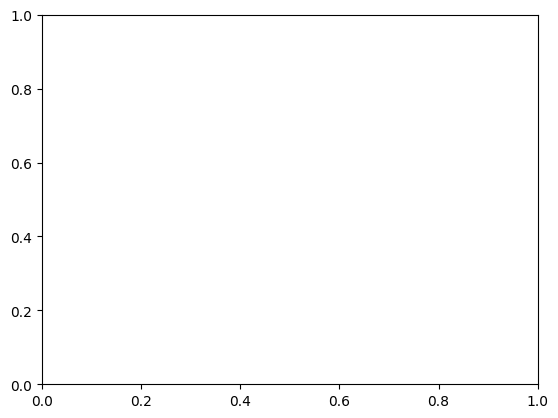

In [88]:
plt.scatter(dow, kospi, marker='.')  # 데이터 개수가 다르기 때문

In [89]:
import pandas as pd

# DOW와 KOSPI의 공통 날짜 인덱스를 사용하여 데이터프레임 생성
# 한쪽에 데이터가 없으면 값이 없다는 의미의 NaN으로 채워줌
df = pd.concat([dow['Close'], kospi['Close']], axis=1, join='inner')
df.columns = ['DOW', 'KOSPI']

df

,DOW,KOSPI
Date,,
2000-01-04 00:00:00+00:00,10997.929688,1059.040039
2000-01-05 00:00:00+00:00,11122.650391,986.309998
2000-01-06 00:00:00+00:00,11253.259766,960.789978
2000-01-07 00:00:00+00:00,11522.559570,948.650024
2000-01-10 00:00:00+00:00,11572.200195,987.239990
...,...,...
2024-11-13 00:00:00+00:00,43958.191406,2417.080078
2024-11-14 00:00:00+00:00,43750.859375,2418.860107
2024-11-15 00:00:00+00:00,43444.988281,2416.860107


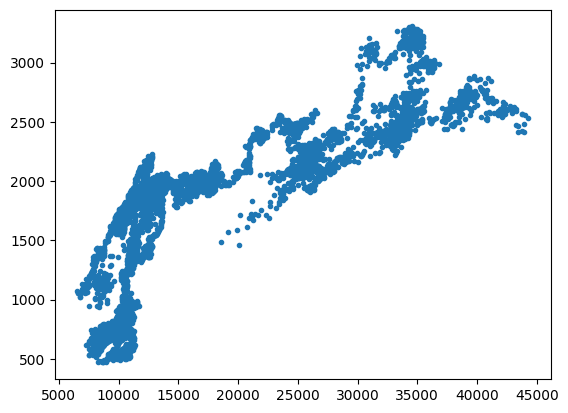

In [90]:
plt.scatter(df['DOW'], df['KOSPI'], marker='.')

- 두 지수는 서로 어느정도 영향을 미치긴 하지만 그리 강하지는 않다. 그래프만 봐서는 정확한 분석이 어렵다. 선형회귀 분석이 필요하다.

In [91]:
!pip install scipy

In [93]:
from scipy import stats
regr = stats.linregress(df['DOW'], df['KOSPI']) # 간단한 선형회귀모델
regr

LinregressResult(slope=0.06108283910189856, intercept=669.4646059937743, rvalue=0.8226535239067075, pvalue=0.0, stderr=0.0005477834805234991, intercept_stderr=10.978241912751091)

순서대로 기울기, y절편, r값(상관계수), p값, 표준편차

In [94]:
df.corr() # 두 지수의 상관계수는 0.822654이다.

,DOW,KOSPI
DOW,1.000000,0.822654
KOSPI,0.822654,1.000000


In [95]:
df['DOW'].corr(df['KOSPI']) # series로 구하는 방법

0.8226535239067075

- 결정계수
    - 관측된 데이터에서 추정한 회귀선이 실제로 데이터를 어느정도 설명하는지 나타내는 계수
    - 결정계수가 1이면 모든 표본 관측치가 추정된 회귀선 상에만 있다는 의미. 즉, 추정된 회귀선이 변수 간의 관계를 완벽히 설명한다.
    - 0이면 추정된 회귀선이 변수사이의 관계를 전혀 설명하지 못한다는 의미

In [96]:
r_value = df['DOW'].corr(df['KOSPI'])
r_value

0.8226535239067075

In [97]:
r_squared = r_value ** 2
r_squared

0.6767588203961238

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-98-25f2607667a0>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')
<ipython-input-98-25f2607667a0>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


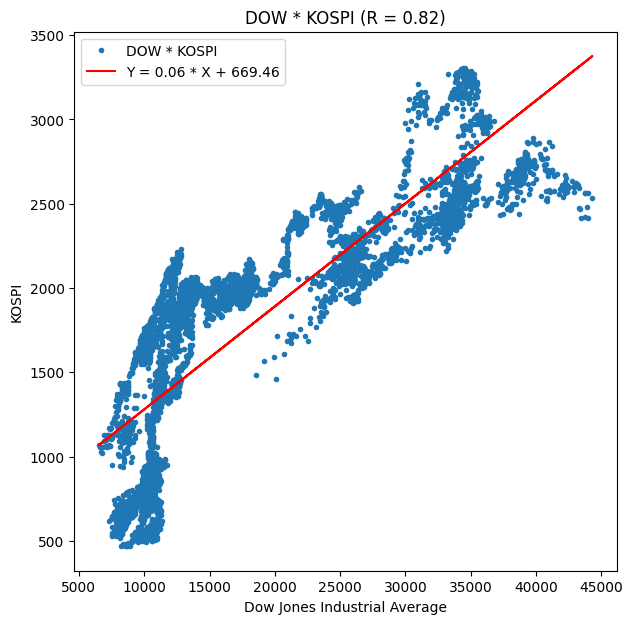

In [98]:
# 다우존스 지수와 KOSPI의 회귀분석

import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from scipy import stats

dow = yf.download('^DJI', start='2000-01-04')
kospi = yf.download('^KS11', start='2000-01-04')

# DOW와 KOSPI를 공통된 인덱스 기준으로 결합
df = pd.concat([dow['Close'], kospi['Close']], axis=1, join='inner')
df.columns = ['X', 'Y']

# 결측값 처리
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

# 선형 회귀
regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

# 그래프 그리기
plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW * KOSPI', regr_line])
plt.title(f'DOW * KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

- 상관계수는 0.82이다. 두 자산에 분산 투자를 할 경우 약간의 리스크 완화 효과를 기대할 수 있다.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-99-066cb2c250a3>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')
<ipython-input-99-066cb2c250a3>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


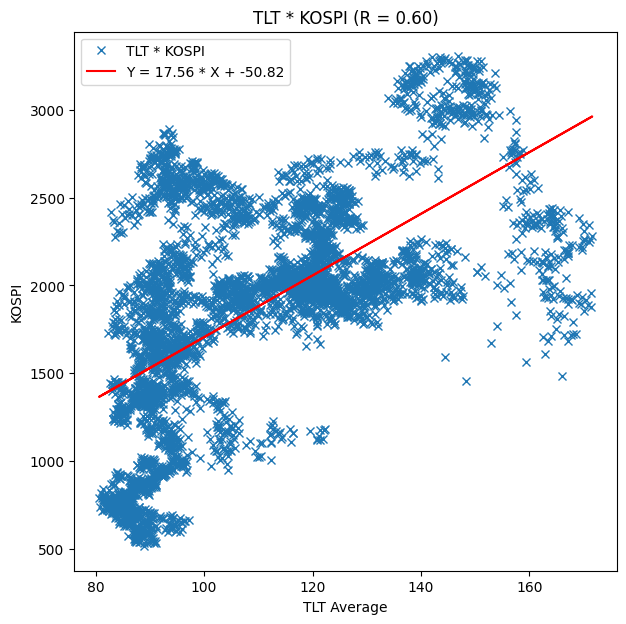

In [99]:
# KOSPI와 미국 국채 상관관계 비교

import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from scipy import stats

# 데이터 다운로드
dow = yf.download('TLT', start='2002-07-30')
kospi = yf.download('^KS11', start='2000-01-04')

# DOW와 KOSPI를 공통된 인덱스 기준으로 결합
df = pd.concat([dow['Close'], kospi['Close']], axis=1, join='inner')
df.columns = ['X', 'Y']

# 결측값 처리
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

# 선형 회귀
regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

# 그래프 그리기
plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, 'x')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['TLT * KOSPI', regr_line])
plt.title(f'TLT * KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('TLT Average')
plt.ylabel('KOSPI')
plt.show()


- 상관관계가 더 낮다. 국내 주식에 이미 투자를 하고 있다면 다우존스 지수에 분산 투자하는 것보다 미국 채권에 분산 투자하는 것이 리스크 완화에 도움이 된다는 의미
- 현대 포트폴리오 이론의 성과 중 하나는 주식과 채권처럼 상관관계가 낮은 자산으로 포트폴리오를 구성함으로써 포트폴리오의 전반적인 위험을 줄일수 있다는 것을 알려주었다는 점이다.(상관계수에 따른 리스크 완화)